In [1]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
import datetime

In [7]:
##### def get_user_input():
    month_year = input("Enter the budget month (MM/YY): ")
    
    # Validate Date Format
    try:
        datetime.datetime.strptime(month_year, "%m/%y")
    except ValueError:
        print("Invalid format! Please enter in MM/YY format.")
        return get_user_input()
    
    total_earnings = float(input("Enter your total earnings: "))
    total_savings = float(input("Enter your current savings: "))
    
    categories = {}
    num_categories = int(input("Enter the number of expense categories: "))
    
    for _ in range(num_categories):
        category = input("Enter category name: ")
        amount = float(input(f"Enter expenditure for {category}: "))
        limit = float(input(f"Enter your set limit for {category}: "))
        categories[category] = {"spent": amount, "limit": limit}
    
    return month_year, total_earnings, total_savings, categories

# Collect data
month_year, earnings, savings, expenses = get_user_input()

Enter the budget month (MM/YY):  01/24
Enter your total earnings:  30000
Enter your current savings:  5000
Enter the number of expense categories:  5
Enter category name:  Rent
Enter expenditure for Rent:  6000
Enter your set limit for Rent:  10000
Enter category name:  Electricity
Enter expenditure for Electricity:  4000
Enter your set limit for Electricity:  5000
Enter category name:  Water
Enter expenditure for Water:  1500
Enter your set limit for Water:  2000
Enter category name:  Food
Enter expenditure for Food:  6000
Enter your set limit for Food:  8000
Enter category name:  Clothes 
Enter expenditure for Clothes :  7000
Enter your set limit for Clothes :  8000


In [9]:
def create_dataframe(month_year, earnings, savings, expenses):
    data = {
        "Month_Year": [],
        "Category": [],
        "Spent": [],
        "Limit": [],
        "Over Budget": []
    }
    
    for category, details in expenses.items():
        data["Month_Year"].append(month_year)
        data["Category"].append(category)
        data["Spent"].append(details["spent"])
        data["Limit"].append(details["limit"])
        data["Over Budget"].append(details["spent"] > details["limit"])
    
    df = pd.DataFrame(data)
    return df

df = create_dataframe(month_year, earnings, savings, expenses)
df.head()


,Month_Year,Category,Spent,Limit,Over Budget
0,01/24,Rent,6000.0,10000.0,False
1,01/24,Electricity,4000.0,5000.0,False
2,01/24,Water,1500.0,2000.0,False
3,01/24,Food,6000.0,8000.0,False
4,01/24,Clothes,7000.0,8000.0,False


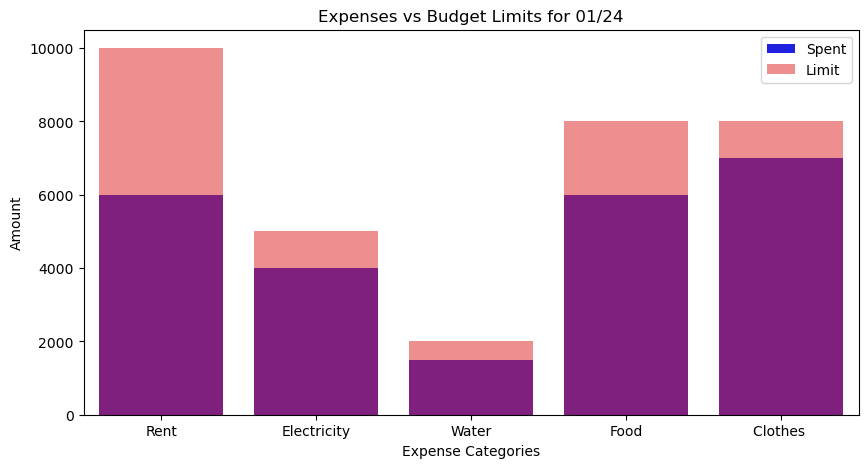

In [11]:
def plot_expenses(df):
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Category", y="Spent", data=df, color="blue", label="Spent")
    sns.barplot(x="Category", y="Limit", data=df, color="red", alpha=0.5, label="Limit")
    
    plt.xlabel("Expense Categories")
    plt.ylabel("Amount")
    plt.title(f"Expenses vs Budget Limits for {df['Month_Year'][0]}")
    plt.legend()
    plt.show()

plot_expenses(df)

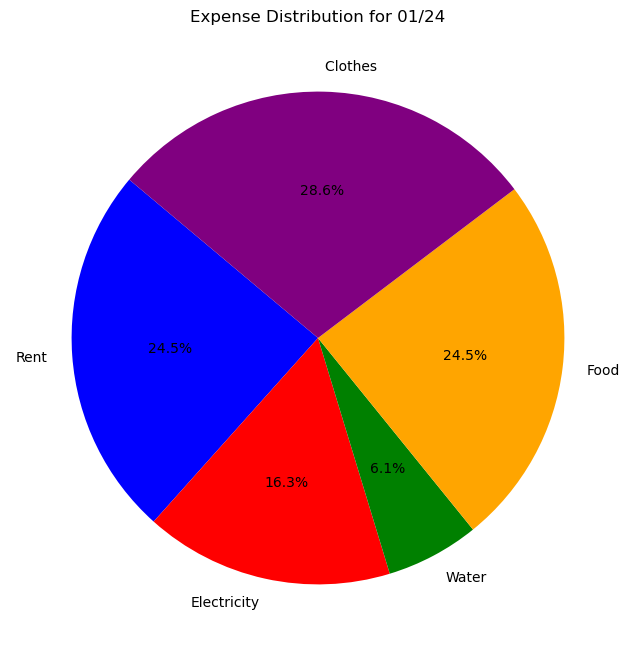

In [13]:
def plot_pie_chart(df):
    plt.figure(figsize=(8, 8))
    plt.pie(df["Spent"], labels=df["Category"], autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green', 'orange', 'purple'])
    plt.title(f"Expense Distribution for {df['Month_Year'][0]}")
    plt.show()

plot_pie_chart(df)

📅 Predicted Spending for Next Month (02/24): {'Rent': 6100.0, 'Electricity': 6100.0, 'Water': 6100.0, 'Food': 6100.0, 'Clothes ': 6100.0}


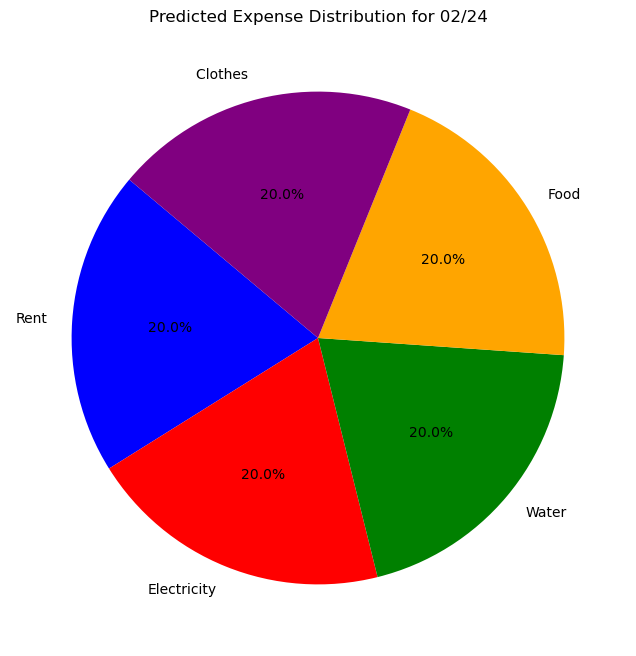

In [23]:
def get_next_month_date(month_year):
    # Convert MM/YY to datetime
    date_obj = datetime.datetime.strptime(month_year, "%m/%y")
    
    # Add one month
    next_month = date_obj.replace(day=1) + datetime.timedelta(days=31)
    next_month = next_month.replace(day=1)  # Ensure it is the first day of the next month
    
    # Convert back to MM/YY format
    return next_month.strftime("%m/%y")

next_month_year = get_next_month_date(month_year)

def predict_expenses(df):
    months = np.array(range(1, len(df) + 1)).reshape(-1, 1)
    future_month = np.array([[len(df) + 1]])
    
    predictions = {}
    
    for i, category in enumerate(df["Category"]):
        model = LinearRegression()
        spendings = np.array(df["Spent"]).reshape(-1, 1)
        model.fit(months, spendings)
        predicted_spending = model.predict(future_month)[0][0]
        predictions[category] = round(predicted_spending, 2)
    
    return predictions

predicted_spending = predict_expenses(df)
print(f"📅 Predicted Spending for Next Month ({next_month_year}):", predicted_spending)

# Convert predicted values to DataFrame for plotting
pred_df = pd.DataFrame(list(predicted_spending.items()), columns=["Category", "Predicted Spending"])

# Pie Chart for Predicted Expenses
def plot_predicted_pie_chart(pred_df, next_month_year):
    plt.figure(figsize=(8, 8))
    plt.pie(pred_df["Predicted Spending"], labels=pred_df["Category"], autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green', 'orange', 'purple'])
    plt.title(f"Predicted Expense Distribution for {next_month_year}")
    plt.show()

plot_predicted_pie_chart(pred_df, next_month_year)

In [17]:
def suggest_savings(earnings, savings, expenses):
    print(f"\n--- Savings Suggestions for {month_year} ---")
    total_spent = sum([exp["spent"] for exp in expenses.values()])
    
    if total_spent > earnings:
        print(f"⚠️ Warning! You are spending more than your earnings ({total_spent} > {earnings}). Consider reducing expenses.")
    
    for category, details in expenses.items():
        if details["spent"] > details["limit"]:
            over_budget = details["spent"] - details["limit"]
            print(f"⚠️ You exceeded your {category} budget by {over_budget}. Try reducing unnecessary costs in this category.")

suggest_savings(earnings, savings, expenses)


--- Savings Suggestions for 01/24 ---


In [19]:
filename = "budget_data.csv"

try:
    existing_df = pd.read_csv(filename)
    df = pd.concat([existing_df, df], ignore_index=True)
except FileNotFoundError:
    pass  # No existing file

df.to_csv(filename, index=False)
print(f"Data for {month_year} saved successfully.")

Data for 01/24 saved successfully.
